【回顾&引言】前面一章的内容大家可以感觉到我们主要是对基础知识做一个梳理，让大家了解数据分析的一些操作，主要做了数据的各个角度的观察。那么在这里，我们主要是做数据分析的流程性学习，主要是包括了数据清洗以及数据的特征处理，数据重构以及数据可视化。这些内容是为数据分析最后的建模和模型评价做一个铺垫。  

开始之前，导入numpy、pandas包和数据

In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('train.csv')

# 第二章：数据清洗及特征处理
我们拿到的数据通常是不干净的，所谓的不干净，就是数据中有缺失值，有一些异常点等，需要经过一定的处理才能继续做后面的分析或建模，所以拿到数据的第一步是进行数据清洗，本章我们将学习缺失值、重复值、字符串和数据转换等操作，将数据清洗成可以分析或建模的亚子。

## 2.1 缺失值观察与处理
我们拿到的数据经常会有很多缺失值，比如我们可以看到Cabin列存在NaN，那其他列还有没有缺失值，这些缺失值要怎么处理呢

### 2.1.1 任务一：缺失值观察
(1) 请查看每个特征缺失值个数  
(2) 请查看Age， Cabin， Embarked列的数据 以上方式都有多种方式，所以大家多多益善

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df[['Age', 'Cabin', 'Embarked']].head()

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S


### 2.1.2 任务二：对缺失值进行处理
(1) 处理缺失值一般有几种思路

(2) 请尝试对Age列的数据的缺失值进行处理

(3) 请尝试使用不同的方法直接对整张表的缺失值进行处理

In [11]:
df1 = df
df1['Age'].isnull() 

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [14]:
df1 = df1.fillna(0)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2.2 重复值观察与处理
由于这样那样的原因，数据中会不会存在重复值呢，如果存在要怎样处理呢  

### 2.2.1 任务一：请查看数据中的重复值

In [16]:
df = df.fillna(0)
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

### 2.2.2 任务二：对重复值进行处理
(1)重复值有哪些处理方式呢？

(2)处理我们数据的重复值

方法多多益善

In [18]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### 2.2.3 任务三：将前面清洗的数据保存为csv格式

In [19]:
df.to_csv('train_clear.csv')

## 2.3 特征观察与处理
我们对特征进行一下观察，可以把特征大概分为两大类：
数值型特征：Survived ，Pclass， Age ，SibSp， Parch， Fare，其中Survived， Pclass为离散型数值特征，Age，SibSp， Parch， Fare为连续型数值特征
文本型特征：Name， Sex， Cabin，Embarked， Ticket，其中Sex， Cabin， Embarked， Ticket为类别型文本特征，数值型特征一般可以直接用于模型的训练，但有时候为了模型的稳定性及鲁棒性会对连续变量进行离散化。文本型特征往往需要转换成数值型特征才能用于建模分析。

### 2.3.1 任务一：对年龄进行分箱（离散化）处理
(1) 分箱操作是什么？

(2) 将连续变量Age平均分箱成5个年龄段，并分别用类别变量12345表示

(3) 将连续变量Age划分为[0,5) [5,15) [15,30) [30,50) [50,80)五个年龄段，并分别用类别变量12345表示

(4) 将连续变量Age按10% 30% 50% 70% 90%五个年龄段，并用分类变量12345表示

(5) 将上面的获得的数据分别进行保存，保存为csv格式

分箱操作是什么？  
回答：分箱操作就是将连续数据转换为分类对应物的过程。分箱操作分为等距分箱和等频分箱。

<AxesSubplot:>

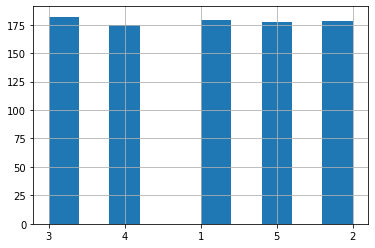

In [36]:
efqc = pd.qcut(df['Age'], q=5, labels=list('12345'))
efqc.hist()

<AxesSubplot:>

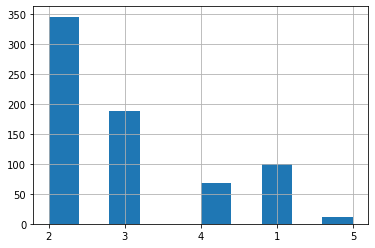

In [21]:
efc = pd.cut(df['Age'], 5, labels=list('12345'))
efc.hist()

In [8]:
labels=list('12345')
labels

['1', '2', '3', '4', '5']

<AxesSubplot:>

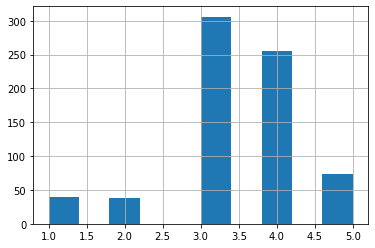

In [12]:
efc = pd.cut(df['Age'], [0,5,15,30,50,80],right = False, labels=[1,2,3,4,5])
efc.hist()

<AxesSubplot:>

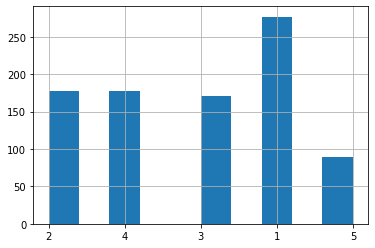

In [48]:
efqc = pd.qcut(df['Age'], [0.1,0.3,0.5,0.7,0.9,1],duplicates='drop', labels=list('12345'))
efqc.hist()

### 2.3.2 任务二：对文本变量进行转换
(1) 查看文本变量名及种类  
(2) 将文本变量Sex， Cabin ，Embarked用数值变量12345表示  
(3) 将文本变量Sex， Cabin， Embarked用one-hot编码表示

In [26]:
df['Sex'].unique()

TypeError: 'DataFrame' object is not callable

In [22]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [33]:
df['Sex'].replace(['male', 'female'],[1,2],inplace= True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df['Cabin'].unique()

array([  0,  82,  56, 130, 146,  50, 112,  14,  64,  42, 102,  24,  72,
        22,  81, 143, 141, 123,  13,  92,  99,  53,  37, 117, 139, 108,
        46, 142,  62, 124,  19,  15,  70, 145,  10,  29,  44,   9, 104,
        94,  88,  79, 103,  84,  41, 135,  47,  58,  90,  55, 114,   4,
        32,  91,  63,  52,  75, 126,  73,  36,  77, 125,  66,  18,  57,
        86, 128, 147,  60, 105,  25, 132,  80,  48, 116, 129,  11,  51,
        54,  87, 127,  98, 118, 134,   2,  26,  65,  97,  43, 122, 107,
        40,  89,  27,  28,  21,  83,  78,   3,  49,  76,   1, 136,  30,
         5,  96, 111, 115,   6,  34,   8, 109, 133,  59,  39,  35, 110,
        33,  20, 140,  74, 121,  85,  67, 138,  16, 106,  68, 101, 119,
        93, 137, 144,  23, 113,  45,  95,  12,  17,  38, 131,  69, 100,
       120,   7,  71,  31,  61])

In [40]:
df['Cabin'].replace(0,'0',inplace= True)

In [36]:
df = df.fillna(0)

In [38]:
from sklearn import preprocessing

In [41]:
df['Cabin'] = preprocessing.LabelEncoder().fit_transform(df['Cabin'])
df['Cabin'].head()

0     0
1    82
2     0
3    56
4     0
Name: Cabin, dtype: int32

In [47]:
df['Embarked'].replace(0,'0',inplace= True)

In [48]:
df['Embarked'] = preprocessing.LabelEncoder().fit_transform(df['Embarked'])
df['Embarked'].head()

0    3
1    1
2    3
3    3
4    3
Name: Embarked, dtype: int32

这里编号是0的船舱都是原来数据中的NaN

In [52]:
df[['Sex','Cabin', 'Embarked']].head()

,Sex,Cabin,Embarked
0,1,0,3
1,2,82,1
2,2,0,3
3,2,56,3
4,1,0,3


In [66]:
for i in ['Sex', 'Cabin', 'Embarked']:
    a = pd.get_dummies(df[i], prefix= i)
    df = pd.concat([df,a], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_143,Cabin_144,Cabin_145,Cabin_146,Cabin_147,Cabin_0,Embarked_0.0,Embarked_1.0,Embarked_2.0,Embarked_3.0
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,0,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2.0,38.0,1.0,0.0,PC 17599,71.2833,...,0,0,0,0,0,0,0,1,0,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",2.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,1,0,0,0,1
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2.0,35.0,1.0,0.0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,1
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,1


### 2.3.3 任务三：从纯文本Name特征里提取出Titles的特征(所谓的Titles就是Mr,Miss,Mrs等)

In [67]:
df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_144,Cabin_145,Cabin_146,Cabin_147,Cabin_0,Embarked_0.0,Embarked_1.0,Embarked_2.0,Embarked_3.0,Title
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,1,Mr
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2.0,38.0,1.0,0.0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,Mrs
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",2.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,...,0,0,0,0,1,0,0,0,1,Miss
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2.0,35.0,1.0,0.0,113803,53.1000,...,0,0,0,0,0,0,0,0,1,Mrs
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,...,0,0,0,0,1,0,0,0,1,Mr
